In [8]:
# import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


# load data
col_to_drop = ['PLAYER', 'CS']
data = pd.read_csv('../dataset/500hits.csv', encoding='latin-1')
data.drop(col_to_drop, axis=1, inplace=True)
data.head()
X = data.drop('HOF', axis=1)  # features
y = data['HOF']  # target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scale data
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:

# build model
model = DecisionTreeClassifier()
default_params = model.get_params()
print(default_params)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [10]:
# evaluate model
confusion_matrix = confusion_matrix(y_test, y_pred) # 59, 3, 11, 20
print('Confusion Matrix: \n', confusion_matrix)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy) # 0.80
classification_report = classification_report(y_test, y_pred)
print('Classification Report: \n', classification_report)

Confusion Matrix: 
 [[48 14  0]
 [ 6 24  1]
 [ 0  0  0]]
Accuracy:  0.7741935483870968
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83        62
           1       0.63      0.77      0.70        31
           2       0.00      0.00      0.00         0

    accuracy                           0.77        93
   macro avg       0.51      0.52      0.51        93
weighted avg       0.80      0.77      0.78        93



C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2B     0.013725
YRS    0.015611
HR     0.019590
G      0.021932
AB     0.034066
BB     0.046334
SB     0.056627
SO     0.057988
H      0.067399
3B     0.068932
RBI    0.108107
BA     0.161743
R      0.327947
dtype: float64


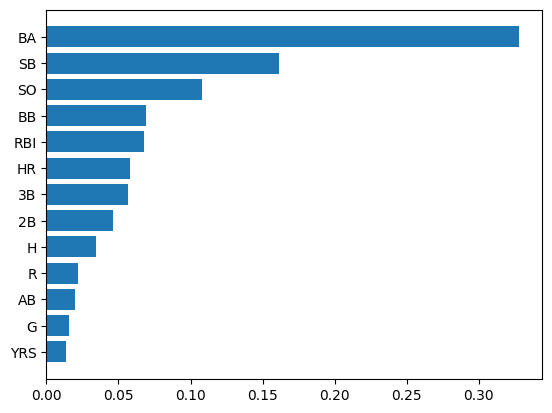

In [11]:
feature_importance = pd.Series(model.feature_importances_, index=data.columns[:-1]).sort_values(ascending=True)
print(feature_importance)
# plot feature importance
import matplotlib.pyplot as plt
plt.barh(data.columns[:-1], feature_importance)
plt.show()

In [12]:
# improve model 
dct2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)
dct2.fit(X_train, y_train)
y_pred2 = dct2.predict(X_test)
# evaluate model
# conf_matrix2 = confusion_matrix(y_test, y_pred2)  # 59, 3, 11, 20
# print('Confusion Matrix: \n', conf_matrix2)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy: ', accuracy2)  # 0.85
# classification_report2 = classification_report(y_test, y_pred2)
# print('Classification Report: \n', classification_report2)

Accuracy:  0.8387096774193549


In [13]:
features2 = pd.Series(dct2.feature_importances_, index=X.columns).sort_values(ascending=True)
print(features2)

YRS    0.000000
G      0.000000
AB     0.000000
H      0.000000
2B     0.000000
3B     0.000000
HR     0.000000
BB     0.000000
SO     0.000000
SB     0.000000
RBI    0.148129
BA     0.297974
R      0.553898
dtype: float64
